In [1438]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [1439]:
def display_value_counts_describe(columns):
    for i in columns:
        display(pd.DataFrame(stud[i].value_counts()))
        display(stud[i].describe())


def get_boxplots(df, columns):
    for i in columns:
        fig, ax = plt.subplots(figsize=(14, 4))
        sns.boxplot(x=i, y='score',
                    data=df,
                    ax=ax)
        plt.xticks(rotation=45)
        ax.set_title('Boxplot for ' + i)
        plt.show()


def get_plots(df, columns):
    for i in columns:
        fig, ax = plt.subplots(figsize=(14, 4))
        df[i].hist()
        ax.set_title('plot for ' + i)
        plt.show()


def get_mode_col(df, column):
    return df[column].mode()[0]


def get_mean_col(df, column):
    return round(df[column].mean())


def get_stat_dif(df, column):
    cols = df.loc[:, column].value_counts().index[:]
    #print(cols)
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        #print(comb)
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [1440]:
display(stud.head())
#stud.info() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [1441]:
display(stud[stud.score == 0])
#вывод score просто не указан и заменить значеня не представляется возможным

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,-3.0,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,-9.0,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,-6.0,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0
136,GP,M,17,R,GT3,T,3.0,4.0,at_home,other,course,mother,3.0,2.0,0.0,no,no,NaN,no,yes,-6.0,yes,no,no,NaN,4.0,5.0,5.0,0.0,0.0
137,GP,F,16,U,GT3,A,3.0,NaN,other,other,NaN,other,NaN,1.0,2.0,no,yes,no,yes,no,-3.0,yes,yes,yes,4.0,3.0,2.0,5.0,0.0,0.0
140,GP,M,15,U,GT3,T,4.0,3.0,teacher,services,NaN,father,2.0,4.0,0.0,yes,yes,no,NaN,yes,-12.0,yes,yes,no,2.0,2.0,2.0,3.0,0.0,0.0
144,GP,M,17,U,GT3,T,2.0,1.0,other,other,home,NaN,1.0,1.0,3.0,no,yes,no,no,yes,-3.0,yes,yes,no,5.0,4.0,5.0,5.0,0.0,0.0
146,GP,F,15,U,GT3,T,3.0,2.0,health,services,home,father,1.0,2.0,3.0,no,NaN,no,no,yes,-6.0,yes,yes,no,3.0,3.0,2.0,3.0,0.0,0.0


In [1442]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [1443]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'pstatus', 'medu', 'fedu',
                'mjob', 'fjob', 'reason', 'guardian', 'traveltime', 'studytime',
                'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
                'freetime', 'goout', 'health', 'absences', 'score']

In [1444]:
count_col = ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'failures',
             'famrel', 'freetime', 'goout', 'health', 'absences', 'score']
str_col = ['school', 'sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian',
           'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

<AxesSubplot:>

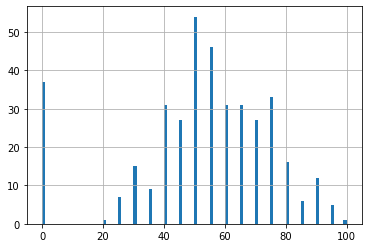

In [1445]:
stud.score.hist(bins = 100)

In [1446]:
display_value_counts_describe(str_col)
#всех признаков больше 10
#для пропусков activities будем использовать no, предпологая что в противном случае ячейка былабы заполнена

,school
GP,349
MS,46


count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

,sex
F,208
M,187


count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

,address
U,295
R,83


count     378
unique      2
top         U
freq      295
Name: address, dtype: object

,famsize
GT3,261
LE3,107


count     368
unique      2
top       GT3
freq      261
Name: famsize, dtype: object

,pstatus
T,314
A,36


count     350
unique      2
top         T
freq      314
Name: pstatus, dtype: object

,mjob
other,133
services,98
at_home,58
teacher,55
health,32


count       376
unique        5
top       other
freq        133
Name: mjob, dtype: object

,fjob
other,197
services,102
teacher,29
at_home,16
health,15


count       359
unique        5
top       other
freq        197
Name: fjob, dtype: object

,reason
course,137
home,104
reputation,103
other,34


count        378
unique         4
top       course
freq         137
Name: reason, dtype: object

,guardian
mother,250
father,86
other,28


count        364
unique         3
top       mother
freq         250
Name: guardian, dtype: object

,schoolsup
no,335
yes,51


count     386
unique      2
top        no
freq      335
Name: schoolsup, dtype: object

,famsup
yes,219
no,137


count     356
unique      2
top       yes
freq      219
Name: famsup, dtype: object

,paid
no,200
yes,155


count     355
unique      2
top        no
freq      200
Name: paid, dtype: object

,activities
yes,195
no,186


count     381
unique      2
top       yes
freq      195
Name: activities, dtype: object

,nursery
yes,300
no,79


count     379
unique      2
top       yes
freq      300
Name: nursery, dtype: object

,higher
yes,356
no,19


count     375
unique      2
top       yes
freq      356
Name: higher, dtype: object

,internet
yes,305
no,56


count     361
unique      2
top       yes
freq      305
Name: internet, dtype: object

,romantic
no,240
yes,124


count     364
unique      2
top        no
freq      240
Name: romantic, dtype: object

In [1447]:
display_value_counts_describe(count_col)
#age целесобразно объединить(19-21)
#fedu заменить 40 на 4 (опечатка)
#famrel -1 на 1(опечатка)
#absences нужно группировать(все свыше 16 или все свыше 22)45 55 70

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

,medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

,fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: fedu, dtype: float64

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


count    367.000000
mean       1.438692
std        0.694181
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


count    388.000000
mean       2.038660
std        0.842078
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

,failures
0.0,293
1.0,49
2.0,16
3.0,15


count    373.000000
mean       0.337802
std        0.743135
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


count    368.000000
mean       3.937500
std        0.927277
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

,score
50.0,54
55.0,46
0.0,37
75.0,33
65.0,31
40.0,31
60.0,31
70.0,27
45.0,27
80.0,16


count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [1448]:
for i in count_col:
    if i in ['score', 'absences', 'failures']:
        stud[i] = stud[i].fillna(0)
        continue
    stud[i] = stud[i].fillna(get_mean_col(stud, i))
stud.drop(stud[stud.score == 0].index[:], inplace = True)
for i in str_col:
    if i == 'activities':
        stud[i] = stud[i].fillna('no')
    stud[i] = stud[i].fillna(get_mode_col(stud, i))
stud['famrel'] = stud['famrel'].apply(lambda x: abs(x)) 
stud['fedu'] = stud['fedu'].apply(lambda x: x if x != 40 else 4)
stud['absences'] = stud['absences'].apply(lambda x: 10 if x < 11 else 20)
stud['age'] = stud['age'].apply(lambda x: x if x < 19 else 19)
stud['famrel'] = stud['famrel'].apply(lambda x: x if x > 2 else 2)
stud['medu'] = stud['medu'].apply(lambda x: x if x > 1 else 1)
stud['fedu'] = stud['fedu'].apply(lambda x: x if x > 1 else 1)
stud['traveltime'] = stud['traveltime'].apply(lambda x: x if x < 2 else 2)
stud['studytime'] = stud['studytime'].apply(lambda x: x if x < 3 else 3)
stud['failures'] = stud['failures'].apply(lambda x: x if x < 1 else 1)
stud['freetime'] = stud['freetime'].apply(lambda x: x if x > 2 else 2)
stud['famrel'] = stud['famrel'].apply(lambda x: x if x > 3 else 3)
stud['health'] = stud['health'].apply(lambda x: x if x > 2 else 2)
#stud['score'] = stud['score'].apply(lambda x: 20 if x < 21 else \
#                                    40 if x < 41 else 60 if x < 61 else 80 if x < 81 else 100)
#stud['score'] = stud['score'].apply(lambda x: x if x != 0 else 50)

display(stud)

    

,school,sex,age,address,famsize,pstatus,medu,fedu,mjob,fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,4.0,3.0,10,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,10,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,1.0,yes,no,no,no,yes,-6.0,yes,yes,no,4.0,3.0,2.0,3.0,10,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,10,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,10,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,19,U,LE3,A,2.0,2.0,services,services,course,mother,1.0,2.0,1.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,20,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,3.0,4.0,5.0,2.0,10,80.0
392,MS,M,19,R,GT3,T,1.0,1.0,other,other,course,mother,1.0,1.0,1.0,no,no,no,no,no,-3.0,yes,no,no,5.0,5.0,3.0,3.0,10,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,10,50.0


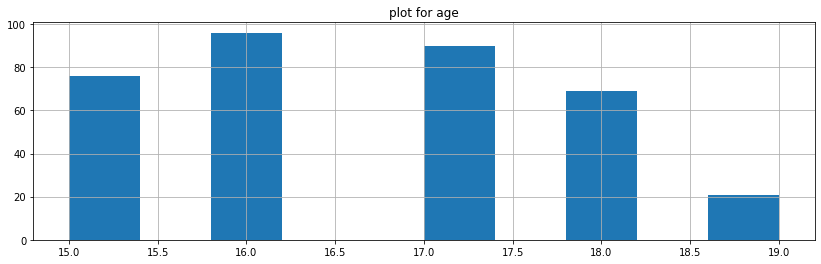

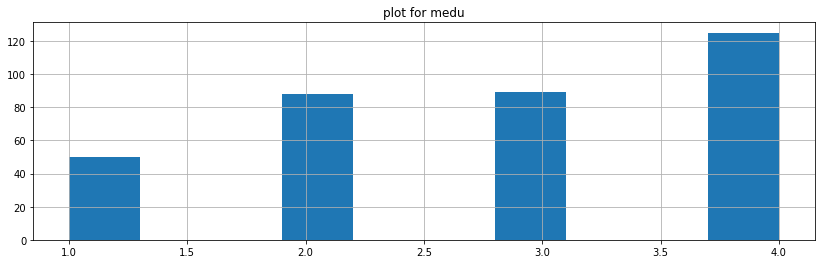

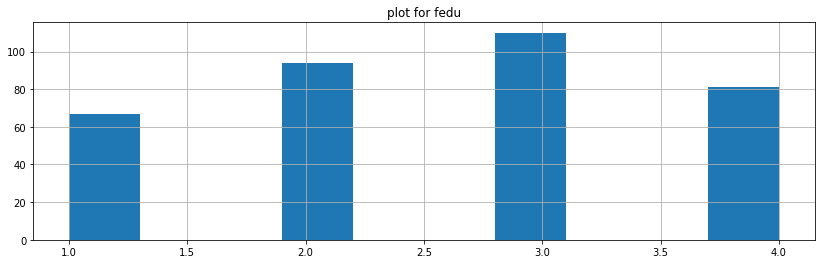

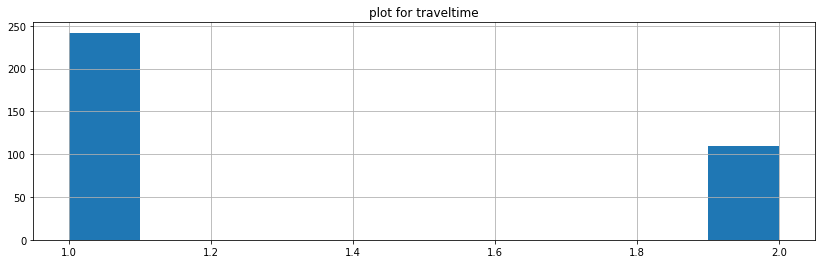

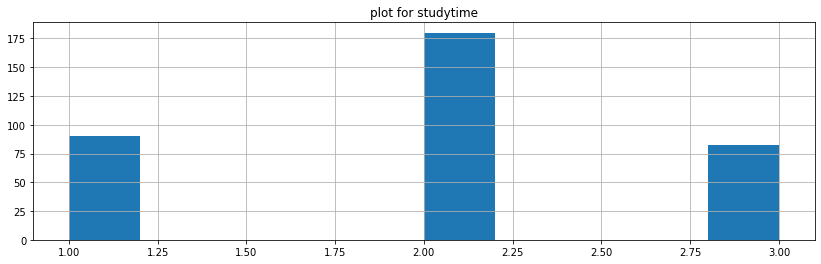

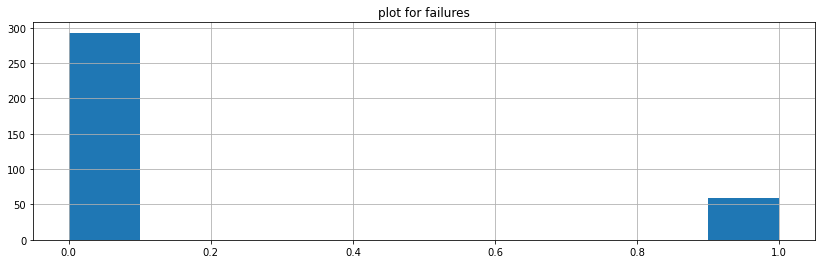

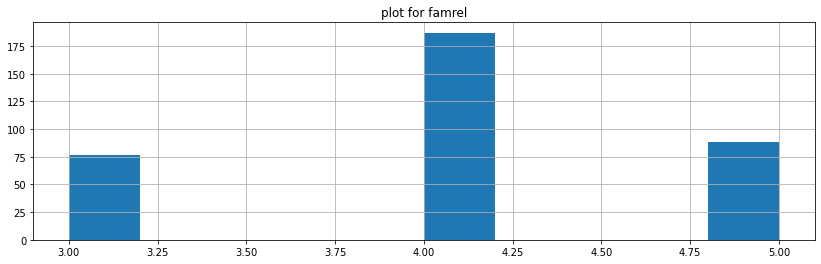

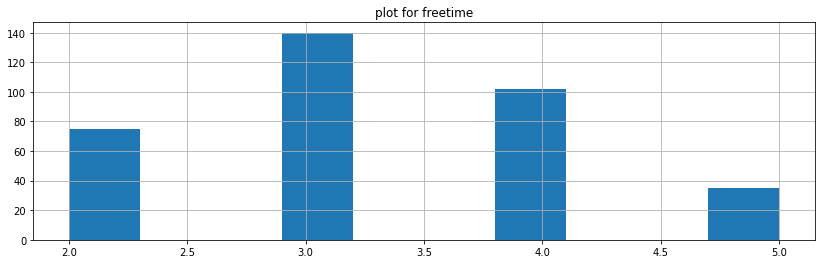

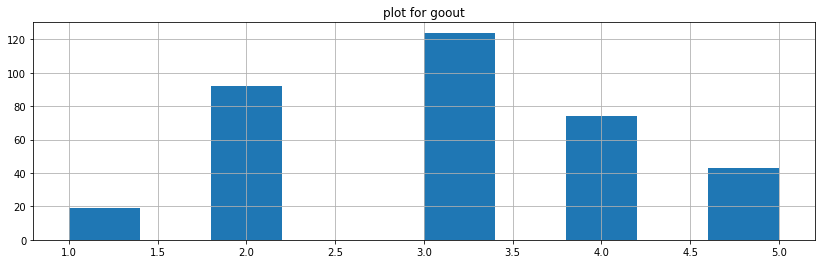

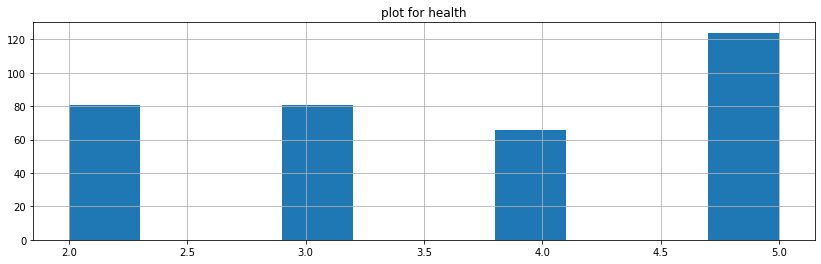

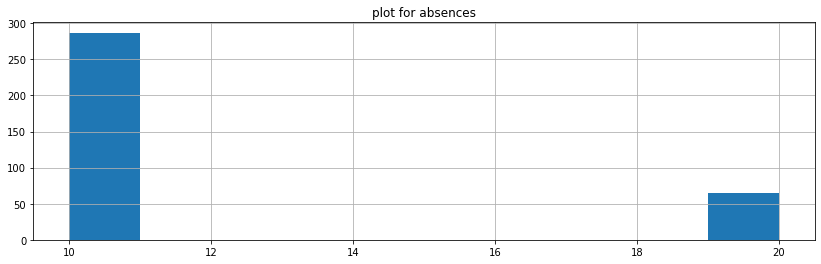

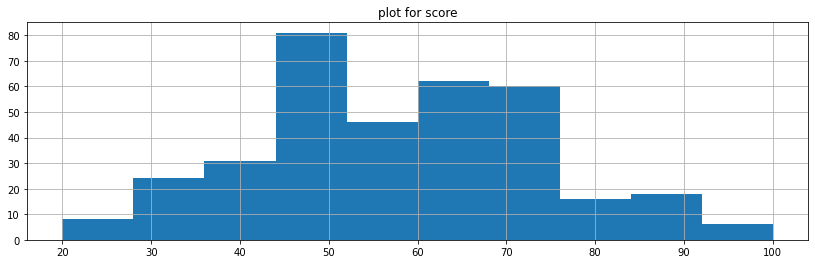

In [1449]:
get_plots(stud, count_col)
#выбросы
#age целесобразно объединить(19-21)
#fedu заменить 40 на 4 (опечатка)
#absences нужно группировать(все свыше 16 или все свыше 22)
#traveltime обединить 2 и более часа
#famrel -1 опечатка, обхединить 1 и 2
#freetime объединить 2 и 1
#score разобъем на 5 равных интервало 0-20, 20-40 ...

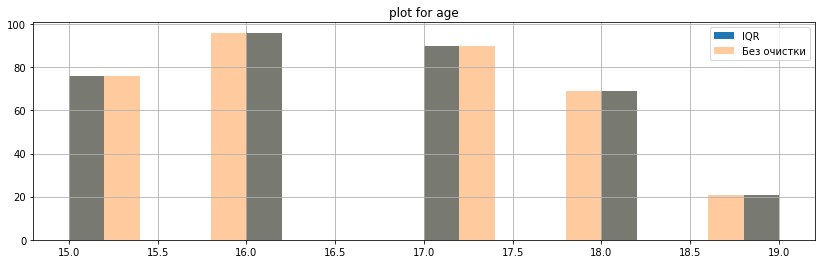

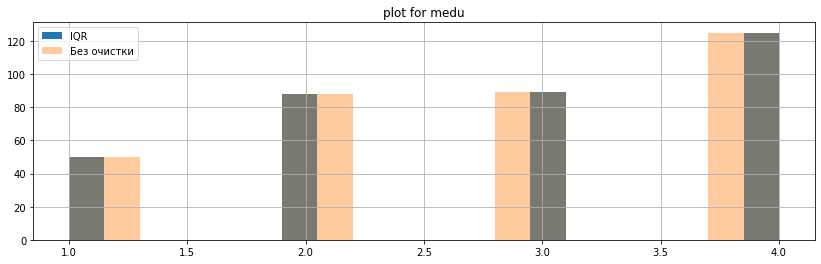

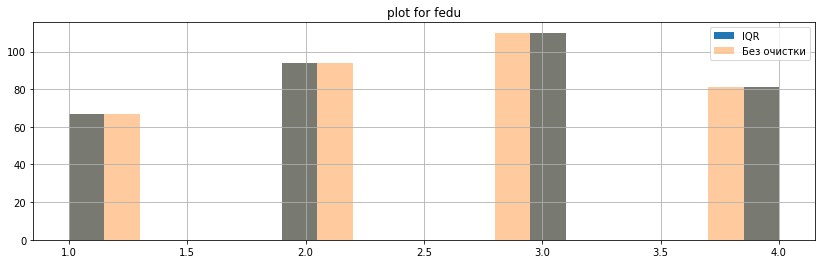

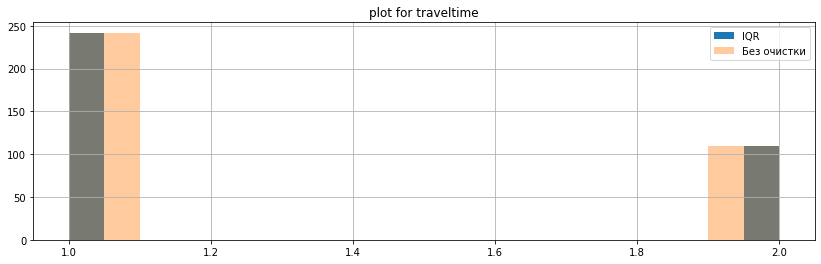

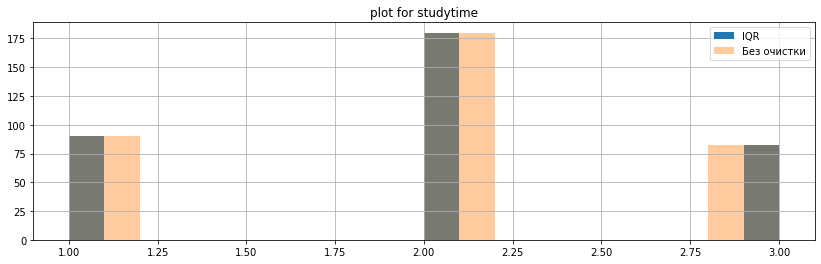

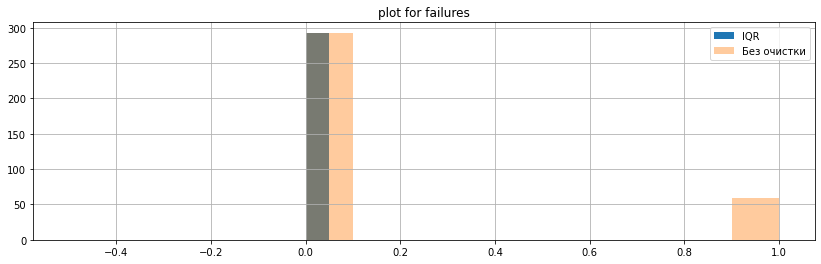

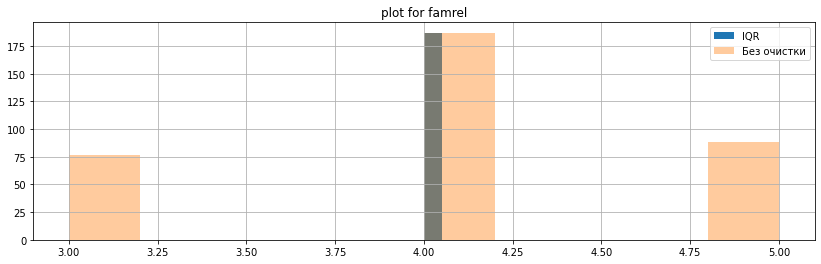

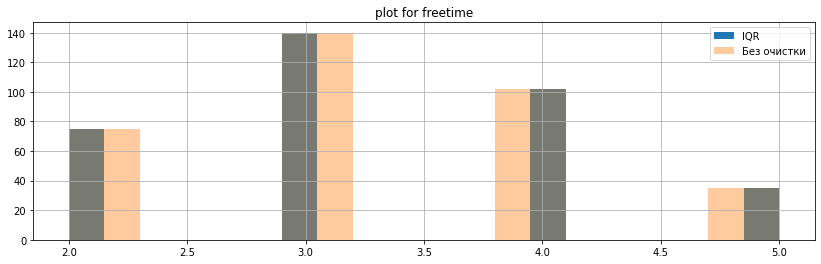

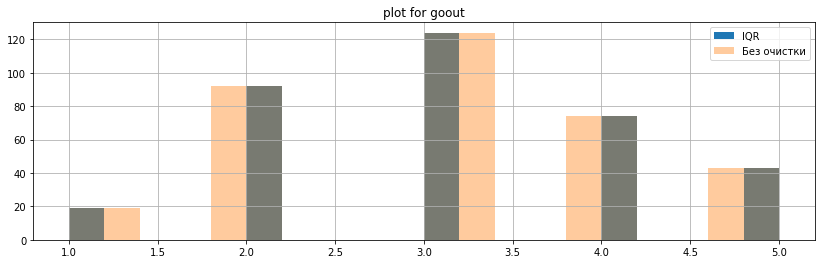

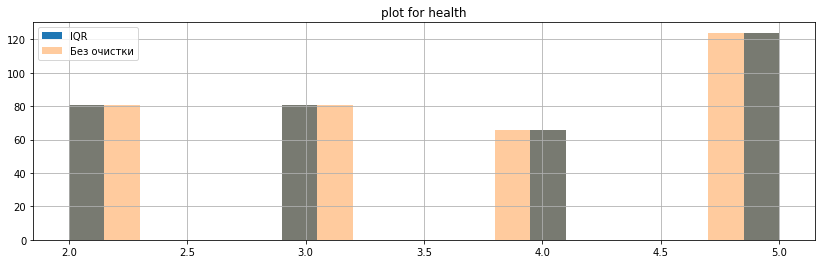

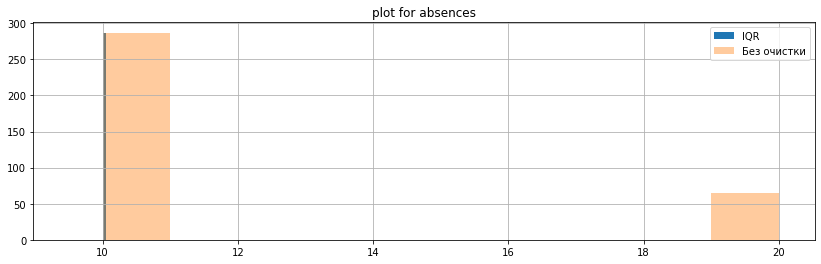

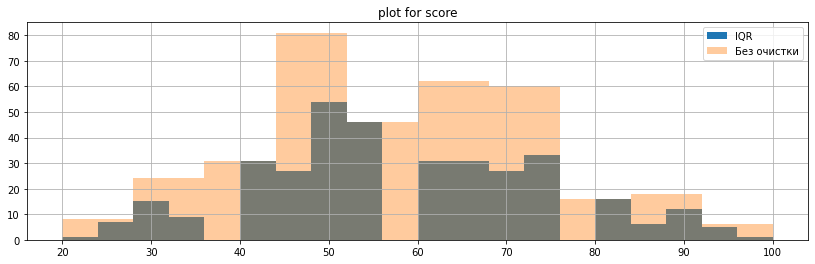

In [1428]:
for i in count_col:
    fig, ax = plt.subplots(figsize=(14, 4))
    IQR = stud[i].quantile(0.75) - stud[i].quantile(0.25)
    perc25 = stud[i].quantile(0.25)
    perc75 = stud[i].quantile(0.75)

    # print(
    #'25-й перцентиль: {},'.format(perc25),
    #'75-й перцентиль: {},'.format(perc75),
    #"IQR: {}, ".format(IQR),
    # "Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

    stud[i].loc[stud[i].between(
        perc25 - 1.5*IQR,
        perc75 + 1.5*IQR)].hist(bins=20, label='IQR')

    stud[i].hist(
        alpha=0.4, bins=10, label='Без очистки')

    plt.legend()

    ax.set_title('plot for ' + i)
    plt.show()
# в связи с малым объемом данных, будем объединять колонки для того чтобы в них попадало сравнимое колличество учеников
# для примера medu, fedu 0 и 1 и трактовать как 1 и менее
# traveltime 2 и более, studytime 3 и молее, failures 0 и 1 и боле, 
#famrel 3 и менее freetime менее 2, health 2 и менее
#absences нужно разбить на 3 участка (менее 10 влючительноб и больше 20)

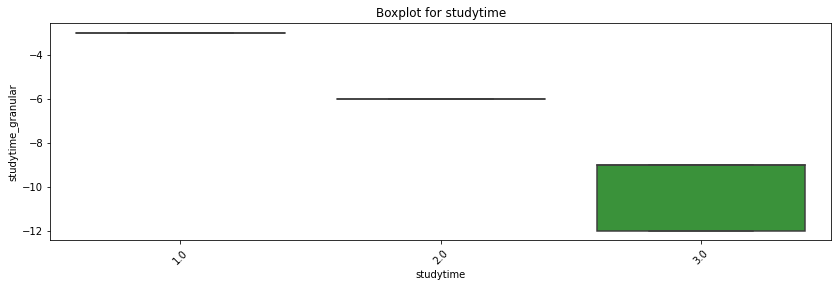

In [1429]:
fig, ax = plt.subplots(figsize = (14, 4))
sns.boxplot(x='studytime', y='studytime_granular', 
data=stud.loc[stud.loc[:, 'studytime'].isin(stud.loc[:, 'studytime'].value_counts().index[:10])],ax=ax)
plt.xticks(rotation=45)
ax.set_title('Boxplot for studytime')
plt.show()
stud.drop(['studytime_granular'], inplace = True, axis = 1)

In [1430]:
#sns.pairplot(stud, kind = 'reg')
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.121687,-0.121860,0.132786,0.033741,0.235958,0.032357,-0.021655,0.116175,-0.067413,0.241492,-0.129328
medu,-0.121687,1.000000,0.599406,-0.110800,0.082095,-0.188241,0.030984,0.018627,0.074699,-0.030011,0.038609,0.191271
fedu,-0.121860,0.599406,1.000000,-0.112211,0.033816,-0.214471,0.006358,-0.025514,0.044236,0.014597,0.008051,0.135781
traveltime,0.132786,-0.110800,-0.112211,1.000000,-0.100886,0.074865,-0.048728,-0.029107,0.014881,-0.066642,-0.052324,-0.061801
studytime,0.033741,0.082095,0.033816,-0.100886,1.000000,-0.126923,0.078776,-0.111029,-0.035046,-0.085249,-0.120752,0.132471
failures,0.235958,-0.188241,-0.214471,0.074865,-0.126923,1.000000,-0.009383,0.131843,0.140498,0.083559,0.276479,-0.276242
famrel,0.032357,0.030984,0.006358,-0.048728,0.078776,-0.009383,1.000000,0.146230,0.050186,0.083609,-0.075269,0.064108
freetime,-0.021655,0.018627,-0.025514,-0.029107,-0.111029,0.131843,0.146230,1.000000,0.282804,0.081751,0.024898,-0.026551
goout,0.116175,0.074699,0.044236,0.014881,-0.035046,0.140498,0.050186,0.282804,1.000000,0.002547,0.050521,-0.179913
health,-0.067413,-0.030011,0.014597,-0.066642,-0.085249,0.083559,0.083609,0.081751,0.002547,1.000000,-0.006372,-0.064389


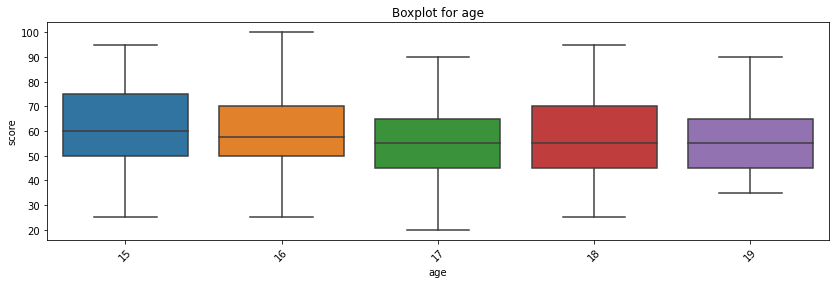

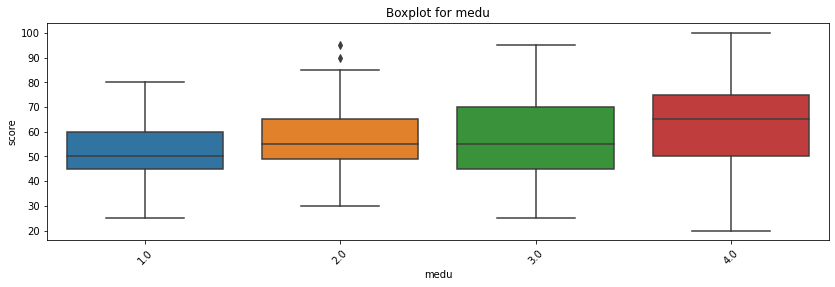

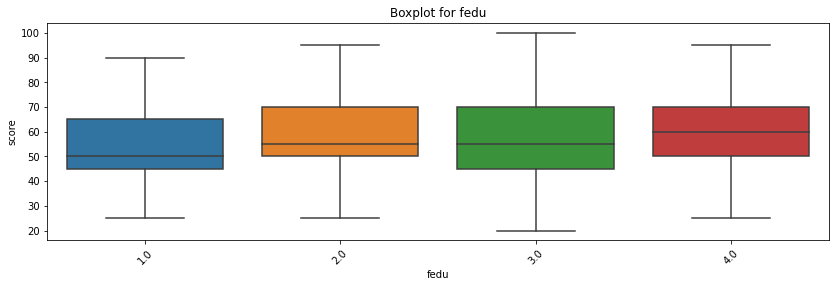

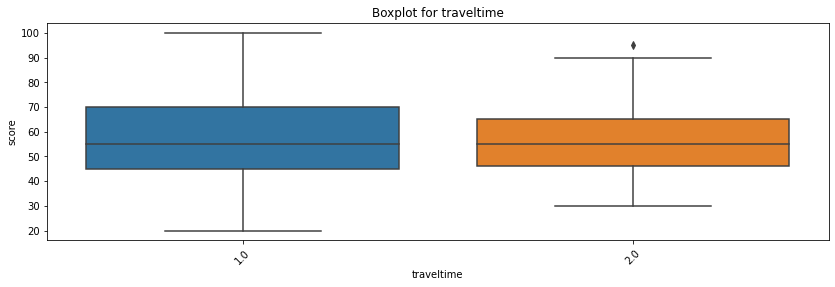

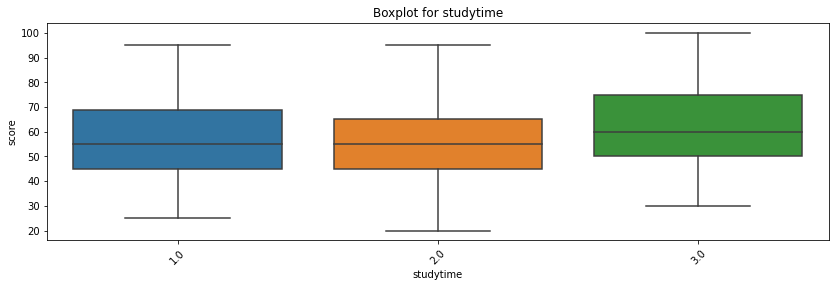

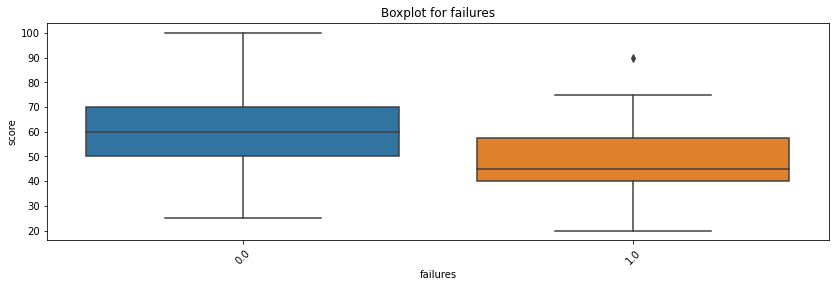

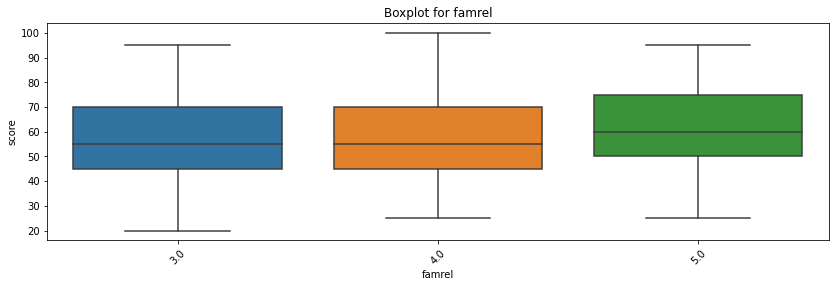

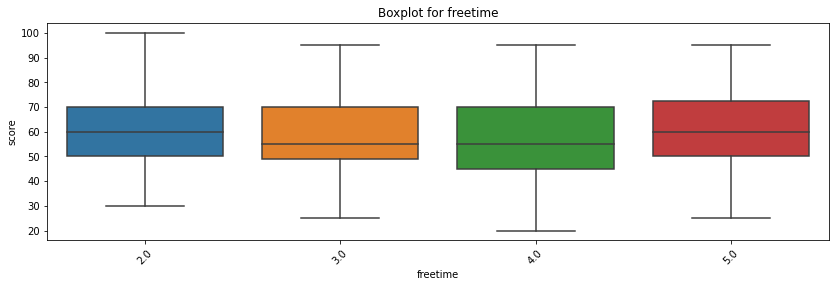

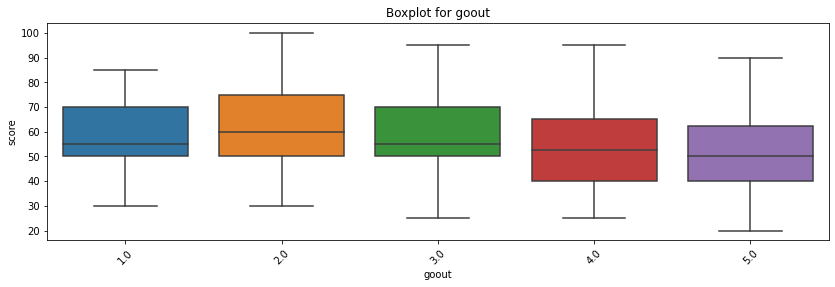

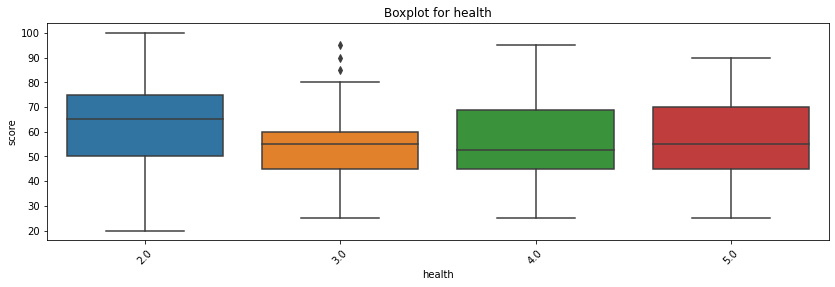

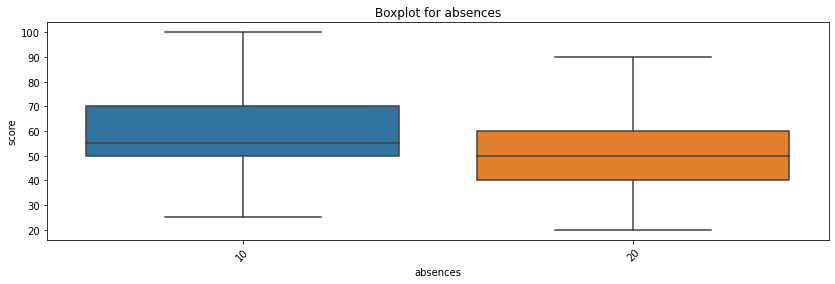

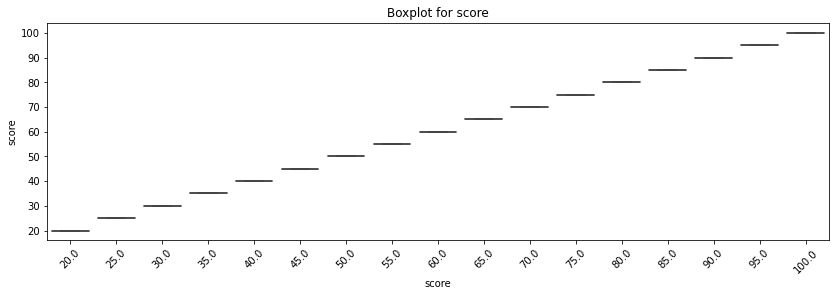

In [1431]:
get_boxplots(stud, count_col)

In [1432]:
stud.drop(['traveltime'], inplace = True, axis = 1)
stud.drop(['freetime'], inplace = True, axis = 1)
stud.drop(['health'], inplace = True, axis = 1)

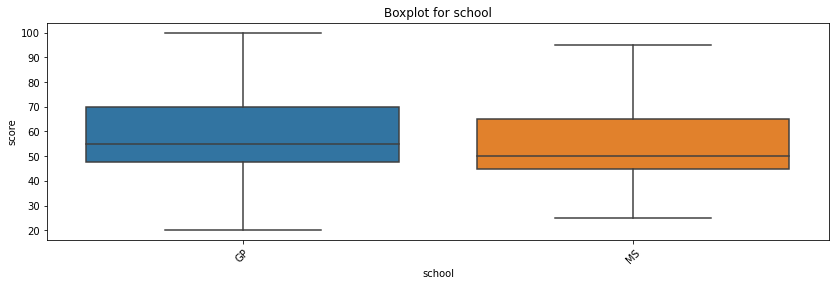

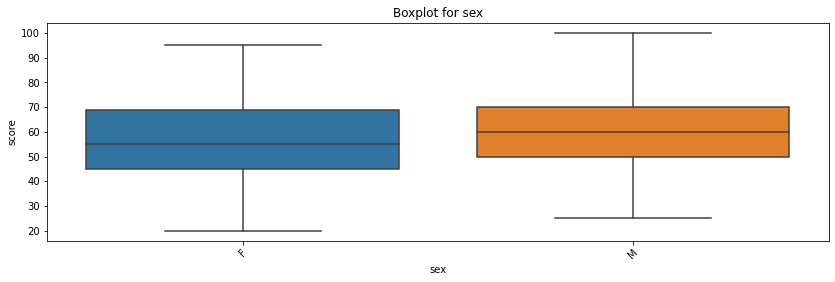

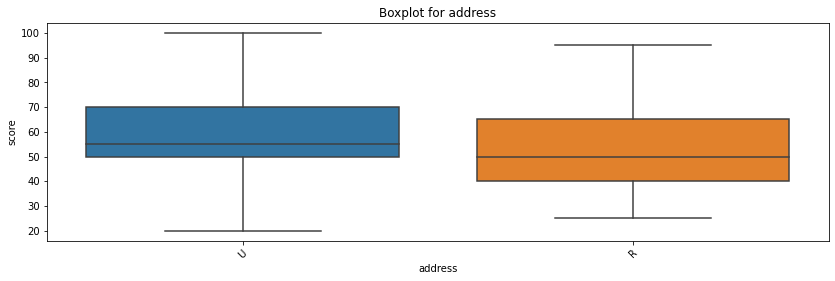

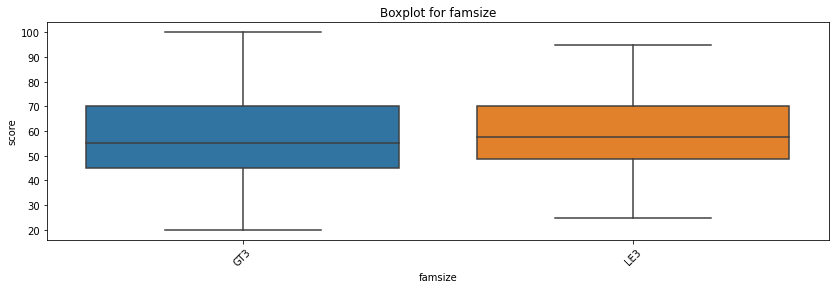

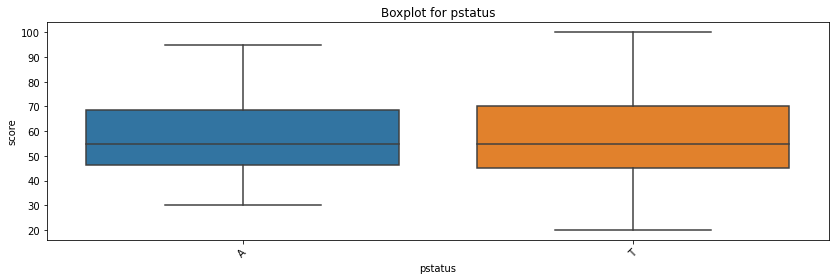

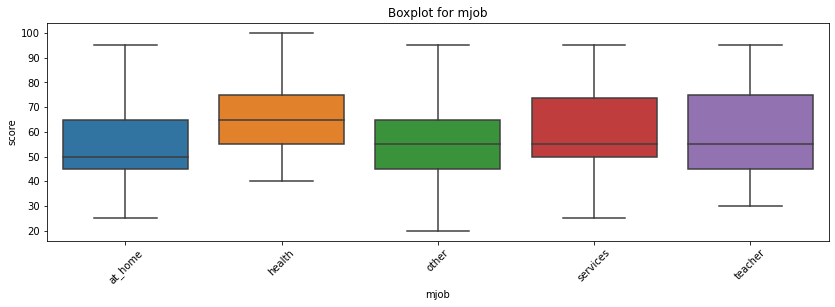

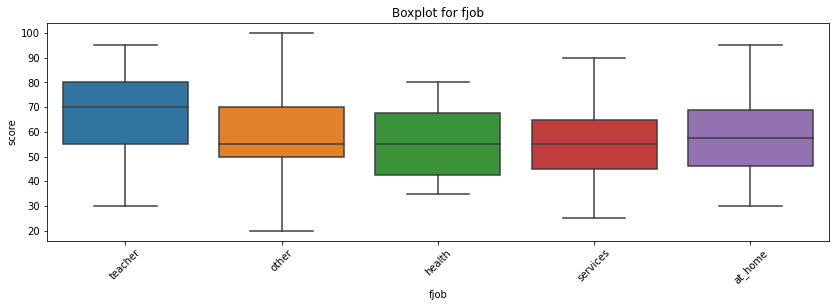

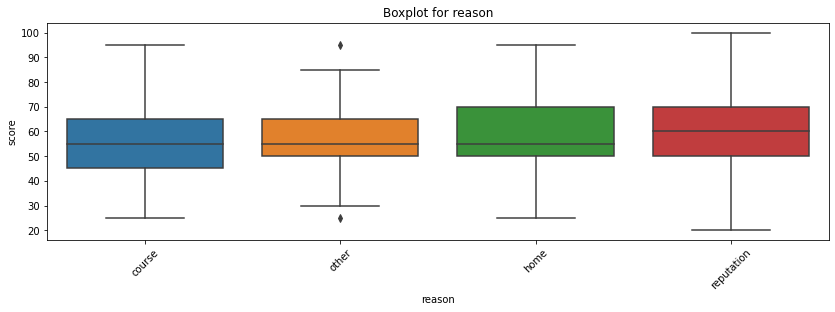

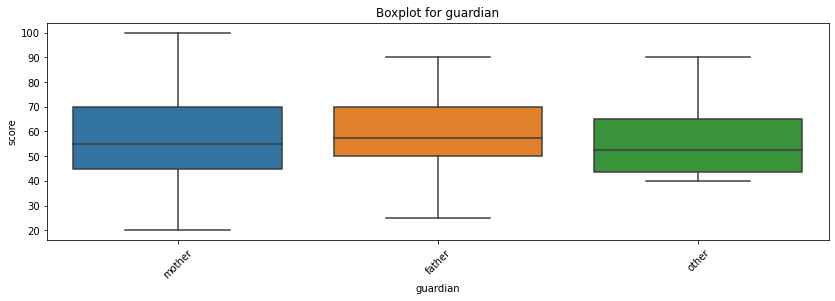

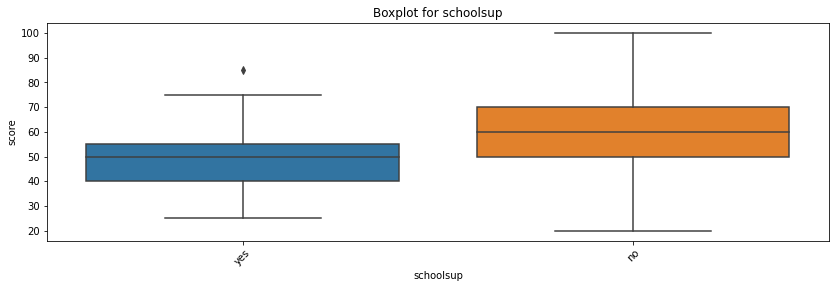

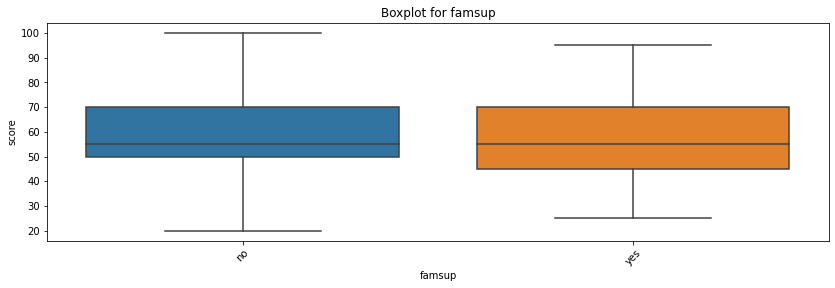

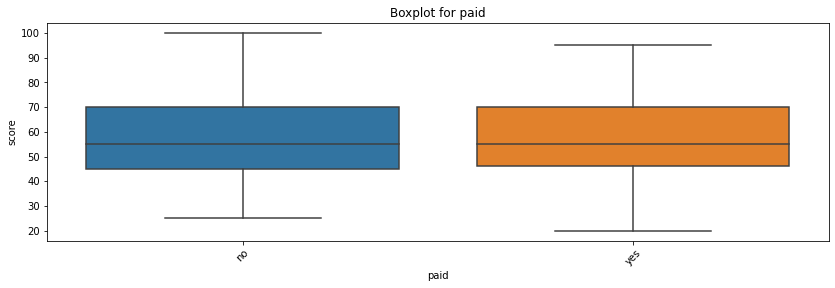

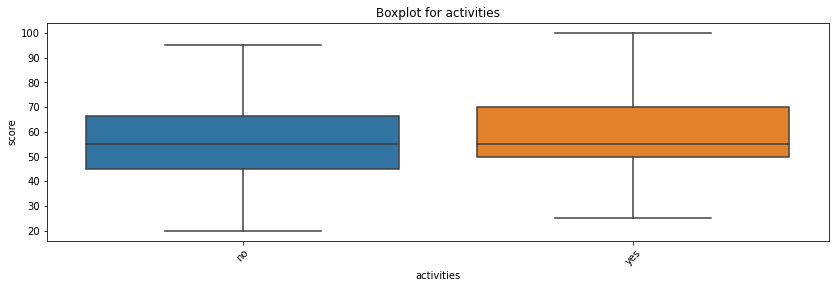

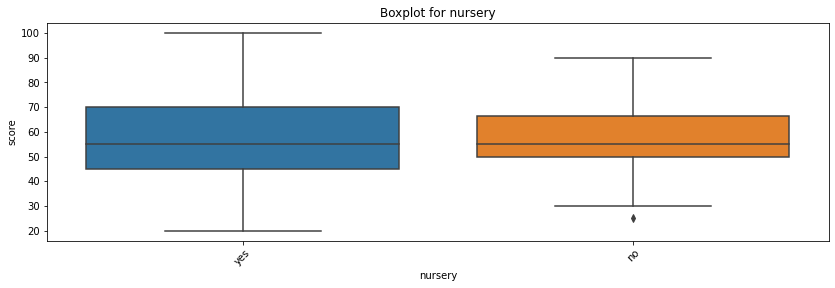

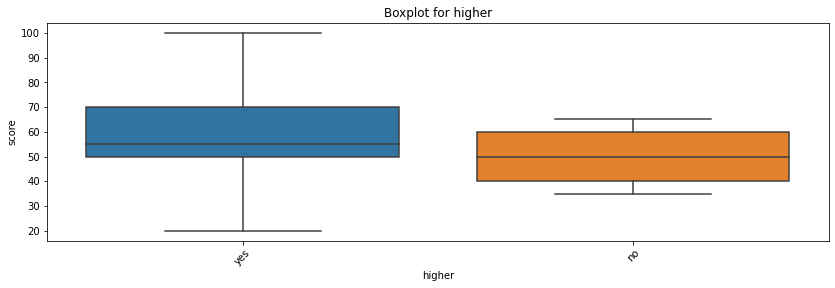

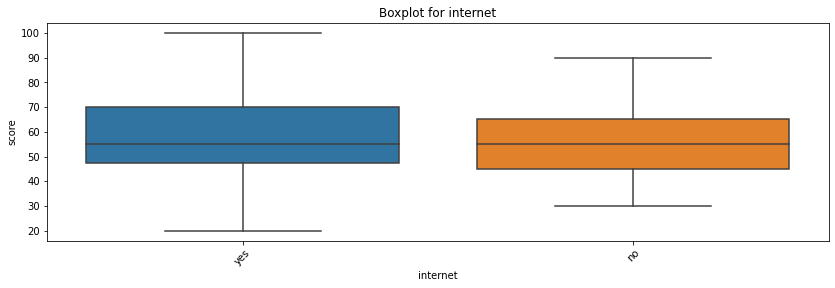

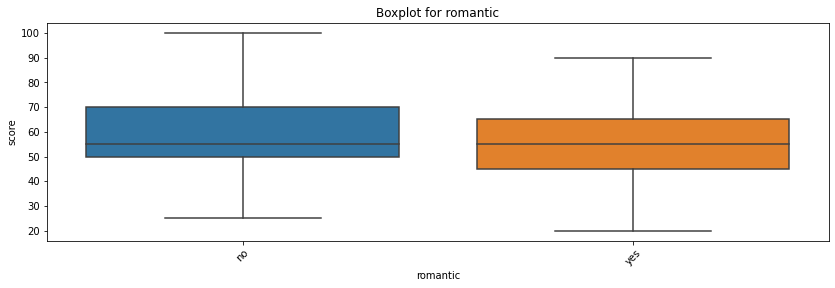

In [1433]:
get_boxplots(stud, str_col)

In [1434]:
stud.drop(['school'], inplace = True, axis = 1)
stud.drop(['internet'], inplace = True, axis = 1)

In [1435]:
for col in ['sex', 'address', 'famsize', 'pstatus', 'mjob', 'fjob', 'reason', 'guardian',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'romantic']:
    get_stat_dif(stud, col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки fjob
Найдены статистически значимые различия для колонки schoolsup


In [1436]:
for col in ['age', 'medu', 'fedu', 'studytime', 'failures',
             'famrel', 'goout', 'absences']:
    get_stat_dif(stud, col)

Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout
Найдены статистически значимые различия для колонки absences


In [1437]:
stud_for_model = stud.loc[:, ['address', 'mjob', 'fjob', 'schoolsup',
                              'medu', 'fedu', 'studytime', 'failures', 'goout', 'absences', 'score']]
stud_for_model.head()

,address,mjob,fjob,schoolsup,medu,fedu,studytime,failures,goout,absences,score
0,U,at_home,teacher,yes,4.0,4.0,2.0,0.0,4.0,10,30.0
1,U,at_home,other,no,1.0,1.0,2.0,0.0,3.0,10,30.0
2,U,at_home,other,yes,1.0,1.0,2.0,1.0,2.0,10,50.0
3,U,health,other,no,4.0,2.0,3.0,0.0,2.0,10,75.0
4,U,other,other,no,3.0,3.0,2.0,0.0,2.0,10,50.0


In [ ]:
В данных достаточно много пустых значений, особенно в столбеце score что очень кретично, также мало самих данных.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это address mjob fjob schoolsup medu fedu studytime failures goout absences score.
